In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fp = os.path.abspath('../dataset/train.csv')
raw_df = pd.read_csv(fp)

In [3]:
# drop unecessary cols
raw_df.drop(columns=["Utilities"], inplace=True)

In [4]:
# feature engineering
raw_df["LogSalePrice"] = np.log(raw_df.SalePrice)
raw_df.CentralAir = [1 if i == "Y" else 0 for i in raw_df.CentralAir]
raw_df["StoneVnr"] = [1 if i == "Stone" else 0 for i in raw_df.MasVnrType]
kitch_qual_conv = {"Ex": 3, "Gd": 2, "TA": 1, "Fa": 0}
raw_df.KitchenQual = [kitch_qual_conv[i] for i in raw_df.KitchenQual]
raw_df.YrSold = raw_df.YrSold - raw_df.YrSold.min()  # years from 2006
raw_df.YearBuilt = raw_df.YearBuilt - raw_df.YearBuilt.min()  # years from 1872
raw_df.YearRemodAdd = raw_df.YearRemodAdd - raw_df.YearRemodAdd.min()  # years from 1950
Neighborhoods = raw_df.Neighborhood.unique()
NbdLookup = dict(zip(Neighborhoods, range(Neighborhoods.size)))
raw_df["NeighborhoodCode"] = raw_df.Neighborhood.replace(NbdLookup)

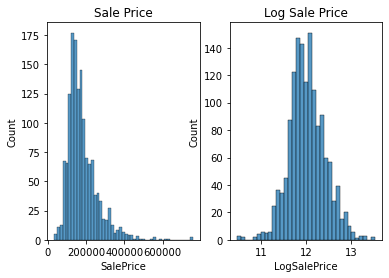

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2)
sns.histplot(raw_df.SalePrice, ax=ax[0])
ax[0].set_title("Sale Price")
sns.histplot(raw_df.LogSalePrice, ax=ax[1])
ax[1].set_title("Log Sale Price")
plt.show()

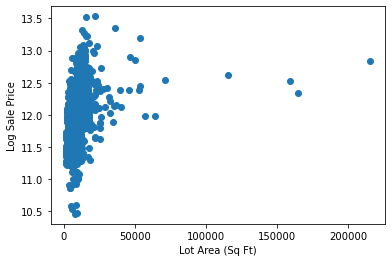

In [6]:
plt.scatter(raw_df.LotArea, raw_df.LogSalePrice)
plt.xlabel("Lot Area (Sq Ft)")
plt.ylabel("Log Sale Price")
plt.show()

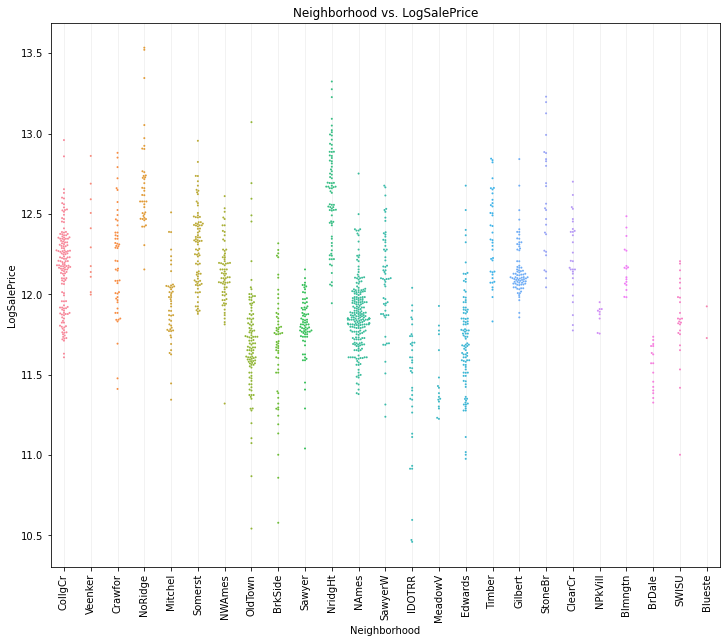

In [7]:
fig, ax = plt.subplots(figsize=(12,10))
sns.swarmplot(x=raw_df.Neighborhood, y=raw_df.LogSalePrice, size=2, ax=ax)
ax.grid(axis="x", alpha=0.2)
ax.set_title("Neighborhood vs. LogSalePrice")
plt.xticks(rotation=90)
plt.show()

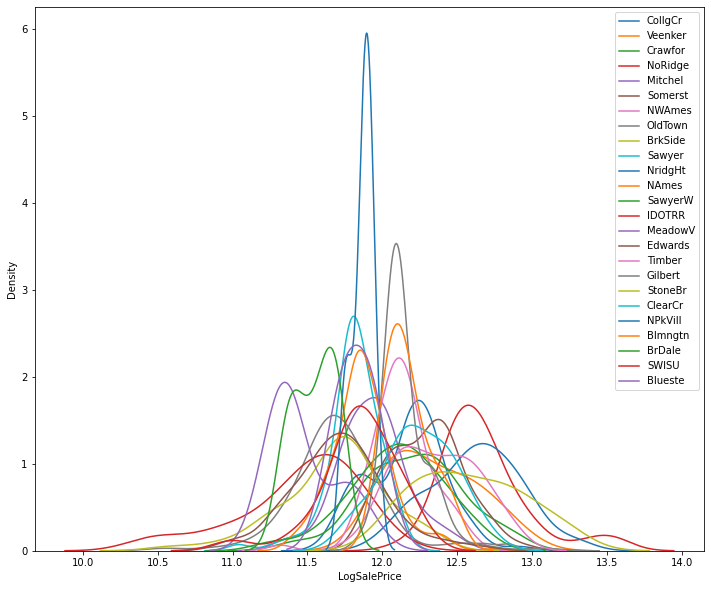

In [8]:
fig, ax = plt.subplots(figsize=(12,10))
for nbd in raw_df.Neighborhood.unique():
    sns.kdeplot(raw_df[raw_df.Neighborhood==nbd].LogSalePrice, ax=ax, label=nbd)
plt.legend()
plt.show()

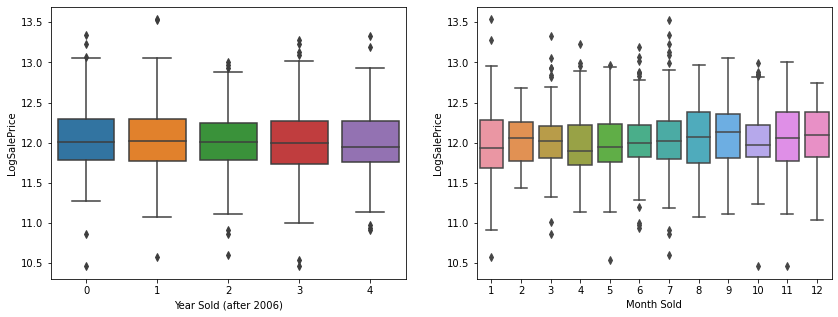

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.boxplot(x=raw_df.YrSold, y=raw_df.LogSalePrice, ax=ax[0])
ax[0].set_xlabel("Year Sold (after 2006)")
sns.boxplot(x=raw_df.MoSold, y=raw_df.LogSalePrice, ax=ax[1])
ax[1].set_xlabel("Month Sold")
plt.show()

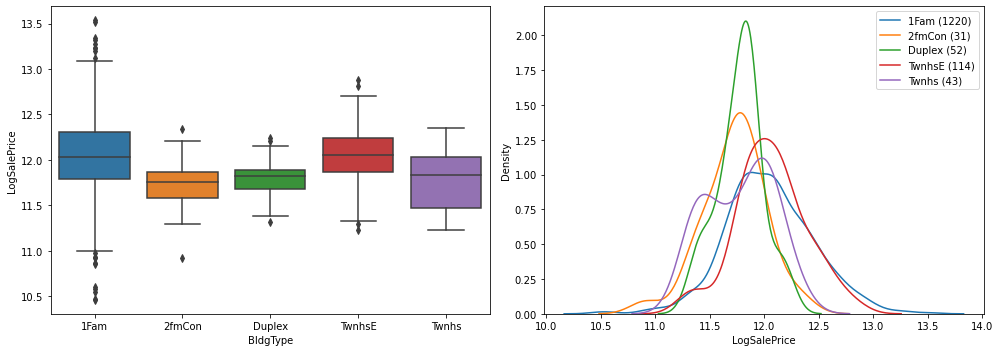

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.boxplot(x=raw_df.BldgType, y=raw_df.LogSalePrice, ax=ax[0])
for btype in raw_df.BldgType.unique():
    nobs = raw_df[raw_df.BldgType==btype].LogSalePrice.size
    sns.kdeplot(raw_df[raw_df.BldgType==btype].LogSalePrice, ax=ax[1], label=f"{btype} ({nobs})")
ax[1].legend()
plt.tight_layout()
plt.show()

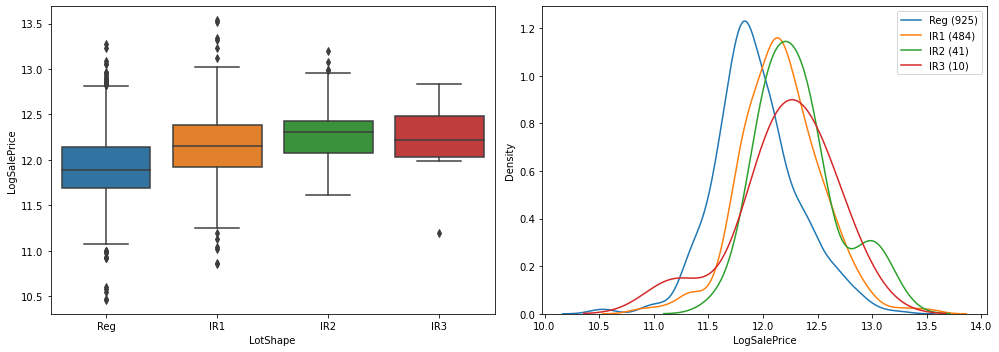

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.boxplot(x=raw_df.LotShape, y=raw_df.LogSalePrice, ax=ax[0])
for lshape in raw_df.LotShape.unique():
    nobs = raw_df[raw_df.LotShape==lshape].LogSalePrice.size
    sns.kdeplot(raw_df[raw_df.LotShape==lshape].LogSalePrice, ax=ax[1], label=f"{lshape} ({nobs})")
ax[1].legend()
plt.tight_layout()
plt.show()

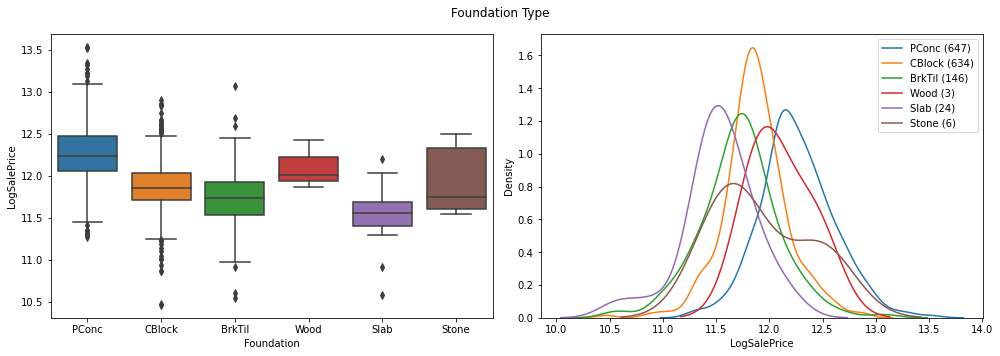

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.boxplot(x=raw_df.Foundation, y=raw_df.LogSalePrice, ax=ax[0])
for ftype in raw_df.Foundation.unique():
    nobs = raw_df[raw_df.Foundation==ftype].LogSalePrice.size
    sns.kdeplot(raw_df[raw_df.Foundation==ftype].LogSalePrice, ax=ax[1], label=f"{ftype} ({nobs})")
ax[1].legend()
plt.suptitle("Foundation Type")
plt.tight_layout()
plt.show()

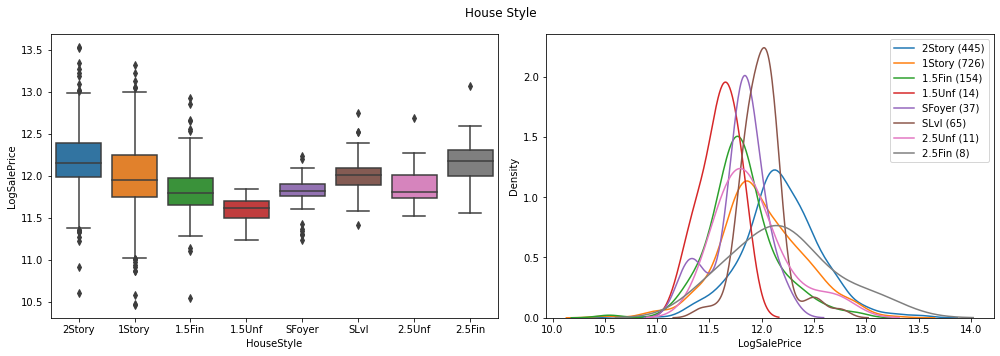

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.boxplot(x=raw_df.HouseStyle, y=raw_df.LogSalePrice, ax=ax[0])
for style in raw_df.HouseStyle.unique():
    nobs = raw_df[raw_df.HouseStyle==style].LogSalePrice.size
    sns.kdeplot(raw_df[raw_df.HouseStyle==style].LogSalePrice, ax=ax[1], label=f"{style} ({nobs})")
ax[1].legend()
plt.suptitle("House Style")
plt.tight_layout()
plt.show()

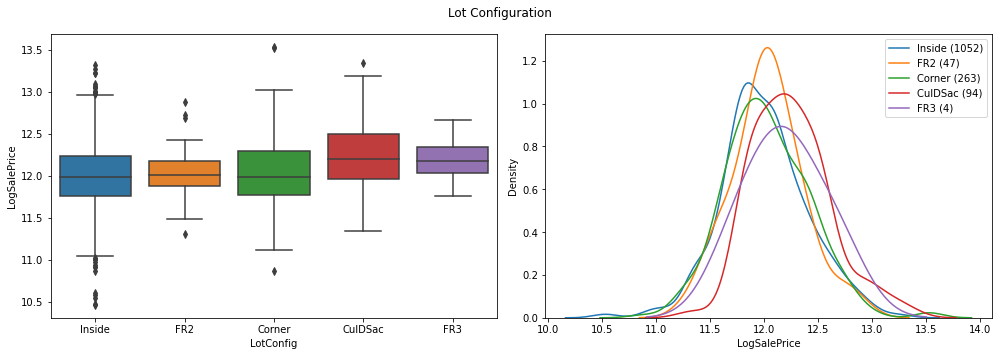

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.boxplot(x=raw_df.LotConfig, y=raw_df.LogSalePrice, ax=ax[0])
for lc in raw_df.LotConfig.unique():
    nobs = raw_df[raw_df.LotConfig==lc].LogSalePrice.size
    sns.kdeplot(raw_df[raw_df.LotConfig==lc].LogSalePrice, ax=ax[1], label=f"{lc} ({nobs})")
ax[1].legend()
plt.suptitle("Lot Configuration")
plt.tight_layout()
plt.show()

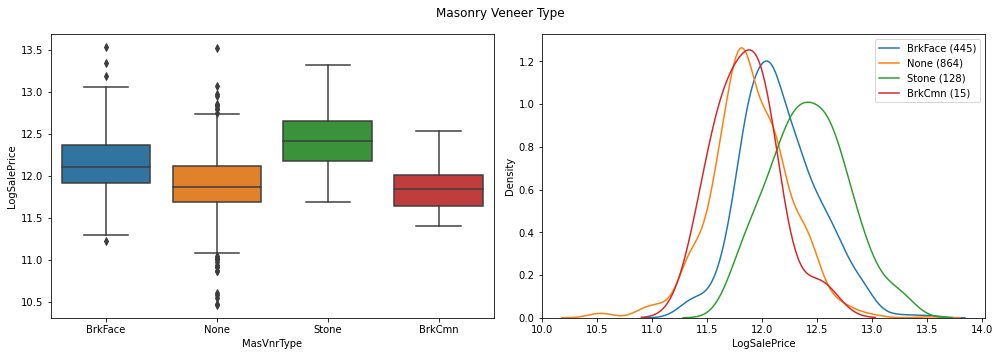

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.boxplot(x=raw_df.MasVnrType, y=raw_df.LogSalePrice, ax=ax[0])
for mvt in raw_df.MasVnrType.unique():
    nobs = raw_df[raw_df.MasVnrType==mvt].LogSalePrice.size
    sns.kdeplot(raw_df[raw_df.MasVnrType==mvt].LogSalePrice, ax=ax[1], label=f"{mvt} ({nobs})")
ax[1].legend()
plt.suptitle("Masonry Veneer Type")
plt.tight_layout()
plt.show()

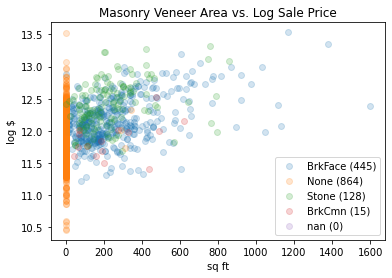

In [16]:
for mvt in raw_df.MasVnrType.unique():
    nobs = raw_df[raw_df.MasVnrType == mvt].LogSalePrice.size
    plt.scatter(raw_df[raw_df.MasVnrType == mvt].MasVnrArea,
                raw_df[raw_df.MasVnrType == mvt].LogSalePrice,
                alpha=0.2, label=f"{mvt} ({nobs})")
plt.ylabel("log $")
plt.xlabel("sq ft")
plt.title("Masonry Veneer Area vs. Log Sale Price")
plt.legend()
plt.show()

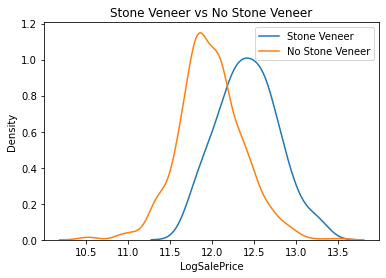

In [17]:
sns.kdeplot(raw_df[raw_df.StoneVnr==1].LogSalePrice, label="Stone Veneer")
sns.kdeplot(raw_df[raw_df.StoneVnr==0].LogSalePrice, label="No Stone Veneer")
plt.title("Stone Veneer vs No Stone Veneer")
plt.legend()
plt.show()

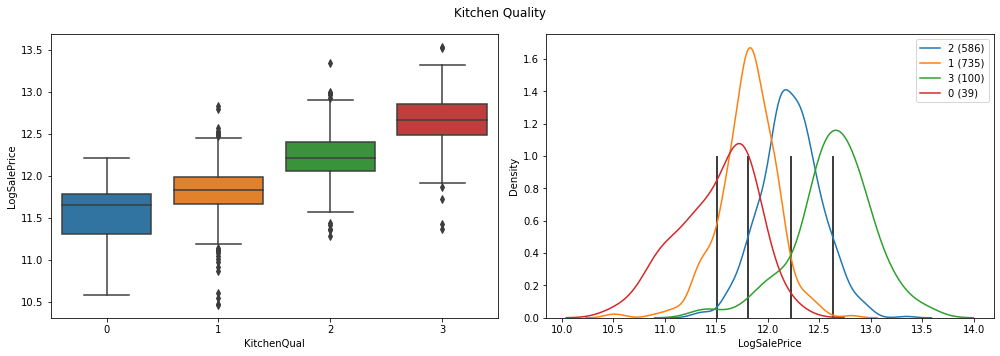

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.boxplot(x=raw_df.KitchenQual, y=raw_df.LogSalePrice, ax=ax[0])
for kq in raw_df.KitchenQual.unique():
    nobs = raw_df[raw_df.KitchenQual==kq].LogSalePrice.size
    sns.kdeplot(raw_df[raw_df.KitchenQual==kq].LogSalePrice, ax=ax[1], label=f"{kq} ({nobs})")
    ax[1].vlines(x=raw_df[raw_df.KitchenQual==kq].LogSalePrice.mean(), ymin=0, ymax=1, color="black")
ax[1].legend()
plt.suptitle("Kitchen Quality")
plt.tight_layout()
plt.show()

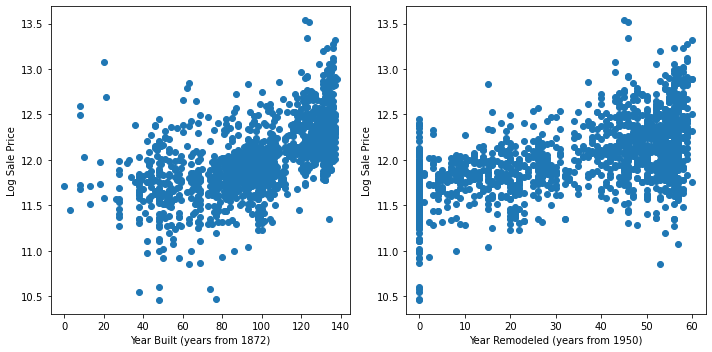

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].scatter(raw_df.YearBuilt, raw_df.LogSalePrice)
ax[0].set_xlabel("Year Built (years from 1872)")
ax[0].set_ylabel("Log Sale Price")
ax[1].scatter(raw_df.YearRemodAdd, raw_df.LogSalePrice)
ax[1].set_xlabel("Year Remodeled (years from 1950)")
ax[1].set_ylabel("Log Sale Price")
plt.tight_layout()
plt.show()

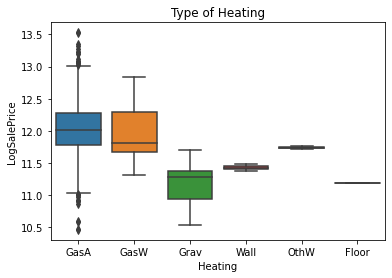

In [20]:
sns.boxplot(x=raw_df.Heating, y=raw_df.LogSalePrice)
plt.title("Type of Heating")
plt.show()

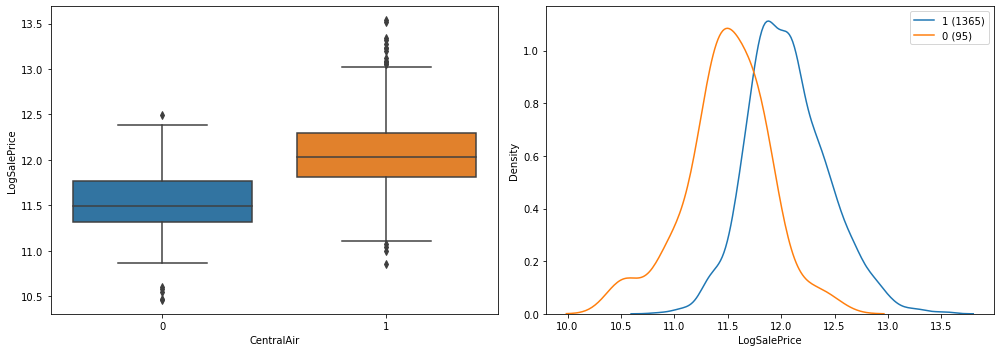

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.boxplot(x=raw_df.CentralAir, y=raw_df.LogSalePrice, ax=ax[0])
for air in raw_df.CentralAir.unique():
    nobs = raw_df[raw_df.CentralAir==air].LogSalePrice.size
    sns.kdeplot(raw_df[raw_df.CentralAir==air].LogSalePrice, ax=ax[1], label=f"{air} ({nobs})")
ax[1].legend()
plt.tight_layout()
plt.show()

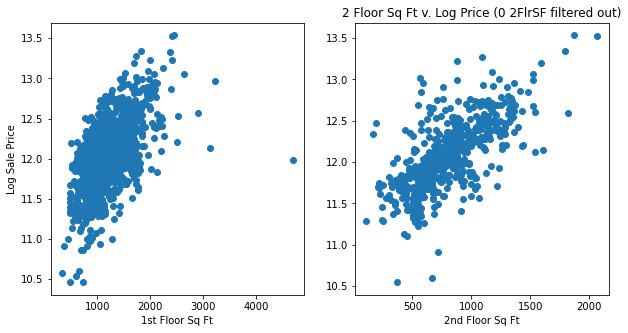

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].scatter(raw_df["1stFlrSF"], raw_df.LogSalePrice)
ax[0].set_xlabel("1st Floor Sq Ft")
ax[0].set_ylabel("Log Sale Price")
ax[1].scatter(raw_df["2ndFlrSF"][raw_df["2ndFlrSF"]>0], raw_df.LogSalePrice[raw_df["2ndFlrSF"]>0])
ax[1].set_title("2 Floor Sq Ft v. Log Price (0 2FlrSF filtered out)")
ax[1].set_xlabel("2nd Floor Sq Ft")
plt.show()

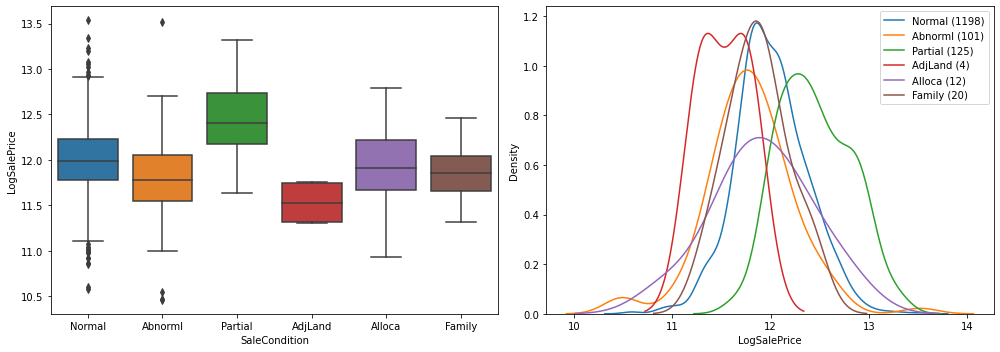

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.boxplot(x=raw_df.SaleCondition, y=raw_df.LogSalePrice, ax=ax[0])
for cond in raw_df.SaleCondition.unique():
    nobs = raw_df[raw_df.SaleCondition==cond].LogSalePrice.size
    sns.kdeplot(raw_df[raw_df.SaleCondition==cond].LogSalePrice, ax=ax[1], label=f"{cond} ({nobs})")
ax[1].legend()
plt.tight_layout()
plt.show()